In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 17

**(c)**
Experiments show that random triangular matrices with entries $\pm 1$ are exponentially ill-conditioned in the sense that if $\kappa_m$ denotes the $2$-norm condition number of a matrix of this kind of dimension $m$, then $\lim_{m \to \infty}(\kappa_m)^{1/m} = C$ for some constant $1  < C < 1.5$. (The limit process can be made precise in various ways, but we shall not go into the techicalities; think of it as holding "with probability 1.") Perform numerical experiments involving random matrices of various dimensions to estimate $C$ to $10\%$ accuracy of better.

In [51]:
def ldu_ones(m, pos_diag=False):
    # Return a lower diagonal matrix of size m x m with 1s, and -1s below the diagonal.
    # If pos_diag=True, then put positive 1s on the diagonal
    L = np.tril(np.random.choice(np.array([1.0, -1.0]), size=(m, m)))
    if pos_diag == True:
        np.fill_diagonal(L, 1.0)
    return L

Below are 100 experiments for random lower diagonal matrices with $\pm 1$ on the off diagonal and positive $1$ on the main diagonal. The matrices range from size $10 \times 10$ to $100 \times 100$ in increments of 10. With all positive diagonals, the constant $C$ appears to approach the value $1.04$.

In [71]:
num_experiments = 1000
step = 10
results = np.empty(num_experiments//step)
for idx, m in enumerate(np.arange(start=10, stop=(num_experiments + 10), step=step)):
    results[idx] = np.linalg.cond(ldu_ones(m, pos_diag=True), p=2) ** (1/m)

In [72]:
results

array([1.61955464, 1.58875183, 1.53575056, 1.37548889, 1.34178682,
       1.45959026, 1.38720436, 1.41130369, 1.36388618, 1.34571063,
       1.42741965, 1.39347466, 1.34941615, 1.34696082, 1.30666599,
       1.28197918, 1.26862659, 1.26054292, 1.24264352, 1.2316332 ,
       1.21355711, 1.20556635, 1.19999228, 1.19179031, 1.17397264,
       1.17238515, 1.17463793, 1.15930835, 1.15748745, 1.1456527 ,
       1.14016757, 1.13851527, 1.13343291, 1.13061939, 1.12751435,
       1.12535129, 1.11974339, 1.11668586, 1.11271322, 1.106368  ,
       1.10399805, 1.10219455, 1.1049709 , 1.098275  , 1.09697593,
       1.094042  , 1.09051656, 1.09659407, 1.08768411, 1.08906869,
       1.08616044, 1.08301117, 1.08040892, 1.08307802, 1.07833179,
       1.07735872, 1.07592385, 1.07608405, 1.07230345, 1.07542892,
       1.07220859, 1.06950932, 1.07086263, 1.06772256, 1.06737581,
       1.06653665, 1.06729422, 1.06434816, 1.06259229, 1.06157047,
       1.06035951, 1.06211055, 1.05917988, 1.05919389, 1.05923

Text(0, 0.5, 'Value of (kappa_m)^(1/m)')

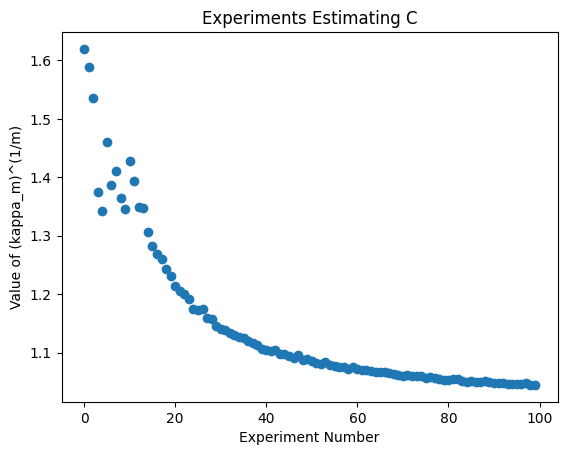

In [73]:
plt.scatter(np.arange(len(results)), results)
plt.title("Experiments Estimating C")
plt.xlabel("Experiment Number")
plt.ylabel("Value of (kappa_m)^(1/m)")

Below are 100 experiments for random lower diagonal matrices with $\pm 1$ on the off diagonal and on the diagonal. The matrices range from size $10 \times 10$ to $100 \times 100$ in increments of 10. The constant $C$ appears to be approximately equal to $1.04$.

In [62]:
num_experiments = 1000
step = 10
results2 = np.empty(num_experiments//step)
for idx, m in enumerate(np.arange(start=10, stop=(num_experiments + 10), step=step)):
    results2[idx] = np.linalg.cond(ldu_ones(m, pos_diag=False), p=2) ** (1/m)

In [70]:
results2

array([1.53921667, 1.52797328, 1.42029594, 1.3954743 , 1.44017393,
       1.41135068, 1.4096382 , 1.36087238, 1.42487281, 1.37081397,
       1.39167079, 1.41266629, 1.33317914, 1.33948187, 1.31227836,
       1.28507339, 1.26523187, 1.26058403, 1.25536143, 1.23012853,
       1.21652462, 1.20563793, 1.19525097, 1.1831102 , 1.17471355,
       1.17603573, 1.16994827, 1.15609736, 1.16110077, 1.14665449,
       1.13994406, 1.1372903 , 1.13479216, 1.12852886, 1.12649777,
       1.12264411, 1.11840748, 1.12132847, 1.11100252, 1.10642132,
       1.11035311, 1.11157849, 1.10301761, 1.09752236, 1.09619227,
       1.09300401, 1.09316147, 1.09680032, 1.08805456, 1.08589449,
       1.08742706, 1.08342224, 1.08375151, 1.07851518, 1.08105888,
       1.08679598, 1.07474652, 1.07582109, 1.07332312, 1.07253561,
       1.07358455, 1.07268326, 1.06743427, 1.07151464, 1.0731788 ,
       1.06756854, 1.06673289, 1.06580386, 1.06232818, 1.06333315,
       1.06105319, 1.05893658, 1.05934176, 1.05819176, 1.06026

Text(0, 0.5, 'Value of (kappa_m)^(1/m)')

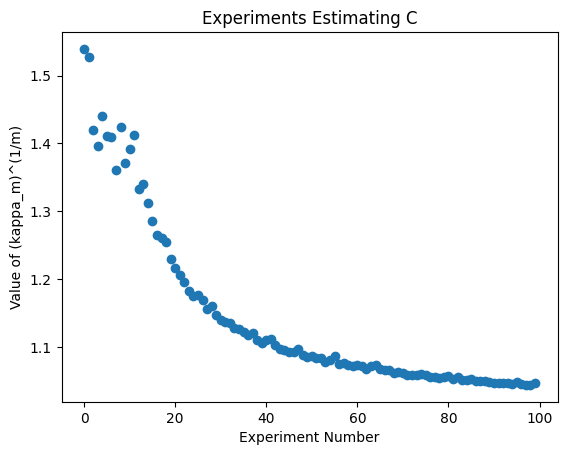

In [64]:
plt.scatter(np.arange(len(results2)), results2)
plt.title("Experiments Estimating C")
plt.xlabel("Experiment Number")
plt.ylabel("Value of (kappa_m)^(1/m)")

**(d)**
Larger scale experiments become feasible if the random matrices of $(c)$ are replaced by the random sequences $\mu_1, \mu_2, \dots $ of $(b)$. Explain (without proof) why the constant $C$ can also be obtained by considering these sequences, and carry out numerical experiments to estimate $C$ to $1\%$ accuracy or better.

In [ ]:
def mu_j(mu):
    if mu == 1.0:
        return mu
    else:
        return np.sum(np.random.choice([1, -1]) mu)

In [74]:
np.random.choice([1, -1]) 

-1